In [1]:
from tensorflow import keras
model=keras.models.load_model('/content/best-cnn-model.h5')

In [2]:
model.layers

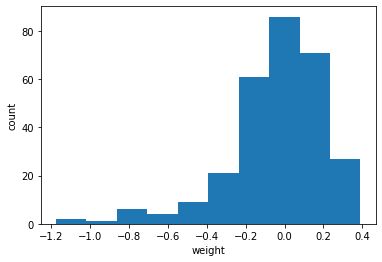

In [6]:
conv=model.layers[0]
conv_weights=conv.weights[0].numpy()
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

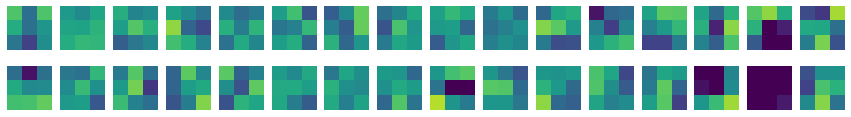

In [9]:
fig, axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [14]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

(3, 3, 1, 32)
0.0040151733 0.081367105


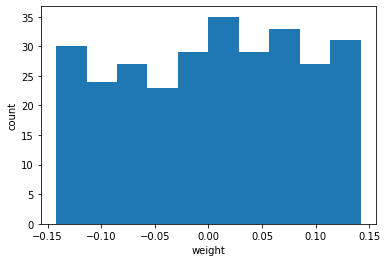

In [15]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

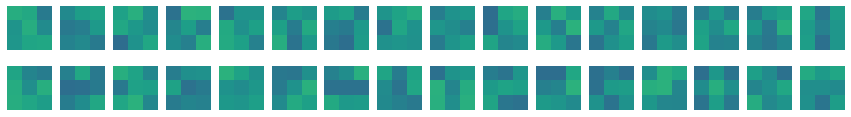

In [16]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [18]:
print(model.input)

conv_acti=keras.Model(model.input,model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


4431872/4422102 [==============================] - 0s 0us/step


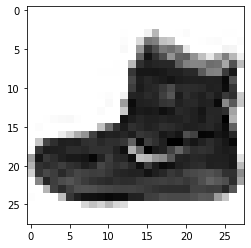

In [19]:
(train_input,train_target),(test_inpt,test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

(1, 28, 28, 32)


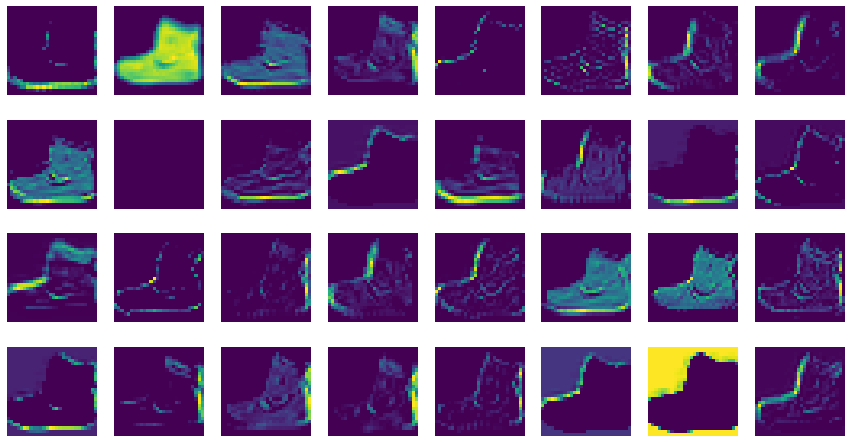

In [21]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)
print(feature_maps.shape)

fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [23]:
conv2_acti=keras.Model(model.input,model.layers[2].output)
feature_maps=conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/255.0)

print(feature_maps.shape)

(1, 14, 14, 64)


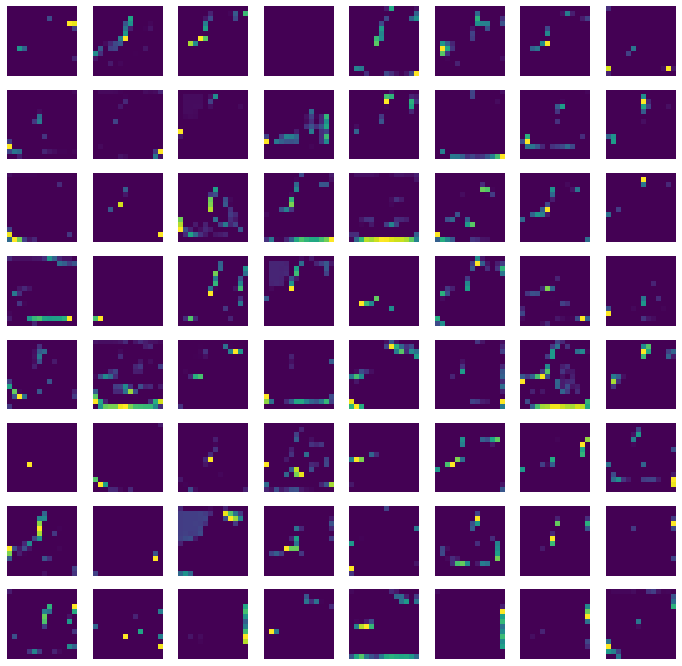

In [24]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()